In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('../Data/immunization_kenya_2022.csv')
data.head()

,county,indicator,Unit,Date,Value
0,Nairobi,BCG vaccination received,NaN,1989,44.4
1,Nairobi,BCG vaccination received,NaN,1993,100.0
2,Nairobi,BCG vaccination received,NaN,1998,97.7
3,Nairobi,BCG vaccination received,NaN,2003,97.6
4,Nairobi,BCG vaccination received,NaN,2008,93.8


In [7]:
data.columns

Index(['county', 'indicator', 'Unit', 'Date', 'Value'], dtype='object')

In [8]:
data.describe()

,Unit,Date,Value
count,0.0,1567.000000,1567.000000
mean,NaN,2017.932993,82.559349
std,NaN,5.710891,29.656624
min,NaN,1989.000000,0.000000
25%,NaN,2014.000000,78.650000
50%,NaN,2022.000000,92.900000
75%,NaN,2022.000000,97.800000
max,NaN,2022.000000,417.000000


In [9]:
data.info

<bound method DataFrame.info of        county                                          indicator  Unit  Date  \
0     Nairobi                           BCG vaccination received   NaN  1989   
1     Nairobi                           BCG vaccination received   NaN  1993   
2     Nairobi                           BCG vaccination received   NaN  1998   
3     Nairobi                           BCG vaccination received   NaN  2003   
4     Nairobi                           BCG vaccination received   NaN  2008   
...       ...                                                ...   ...   ...   
1562   Vihiga                   Hepatitis 2 vaccination received   NaN  2022   
1563   Vihiga                   Hepatitis 3 vaccination received   NaN  2022   
1564   Vihiga  Haemophilus influenza type b 1 vaccination rec...   NaN  2022   
1565   Vihiga  Haemophilus influenza type b 2 vaccination rec...   NaN  2022   
1566   Vihiga  Haemophilus influenza type b 3 vaccination rec...   NaN  2022   

      V

In [10]:
# drop 'Unit' column 
data.drop(columns='Unit', inplace=True)

In [11]:
data.head()

,county,indicator,Date,Value
0,Nairobi,BCG vaccination received,1989,44.4
1,Nairobi,BCG vaccination received,1993,100.0
2,Nairobi,BCG vaccination received,1998,97.7
3,Nairobi,BCG vaccination received,2003,97.6
4,Nairobi,BCG vaccination received,2008,93.8


In [ ]:
# Capitalize column names for uniformity
data.columns = ['County', 'Indicator', 'Date', 'Value']
data.head()

,County,Indicator,Date,Value
0,Nairobi,BCG vaccination received,1989,44.4
1,Nairobi,BCG vaccination received,1993,100.0
2,Nairobi,BCG vaccination received,1998,97.7
3,Nairobi,BCG vaccination received,2003,97.6
4,Nairobi,BCG vaccination received,2008,93.8


In [21]:
# check for null
data.isnull().sum()

County       0
Indicator    0
Date         0
Value        0
dtype: int64

In [22]:
# Unique indicators
print("Number of unique indicators:", data['Indicator'].nunique())
print("Sample indicators:\n", data['Indicator'].unique()[:5])

# Unique counties
print("Number of unique counties:", data['County'].nunique())
print("Counties:\n", sorted(data['County'].unique()))

# Date range
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")


Number of unique indicators: 19
Sample indicators:
 ['BCG vaccination received' 'DPT 1 vaccination received'
 'DPT 2 vaccination received' 'DPT 3 vaccination received'
 'Polio 1 vaccination received']
Number of unique counties: 47
Counties:
 ['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'A", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi', 'Trans-Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot']
Date range: 1989 to 2022


### Data visualization
1. National Trend for Each Indicator (Line Plot)

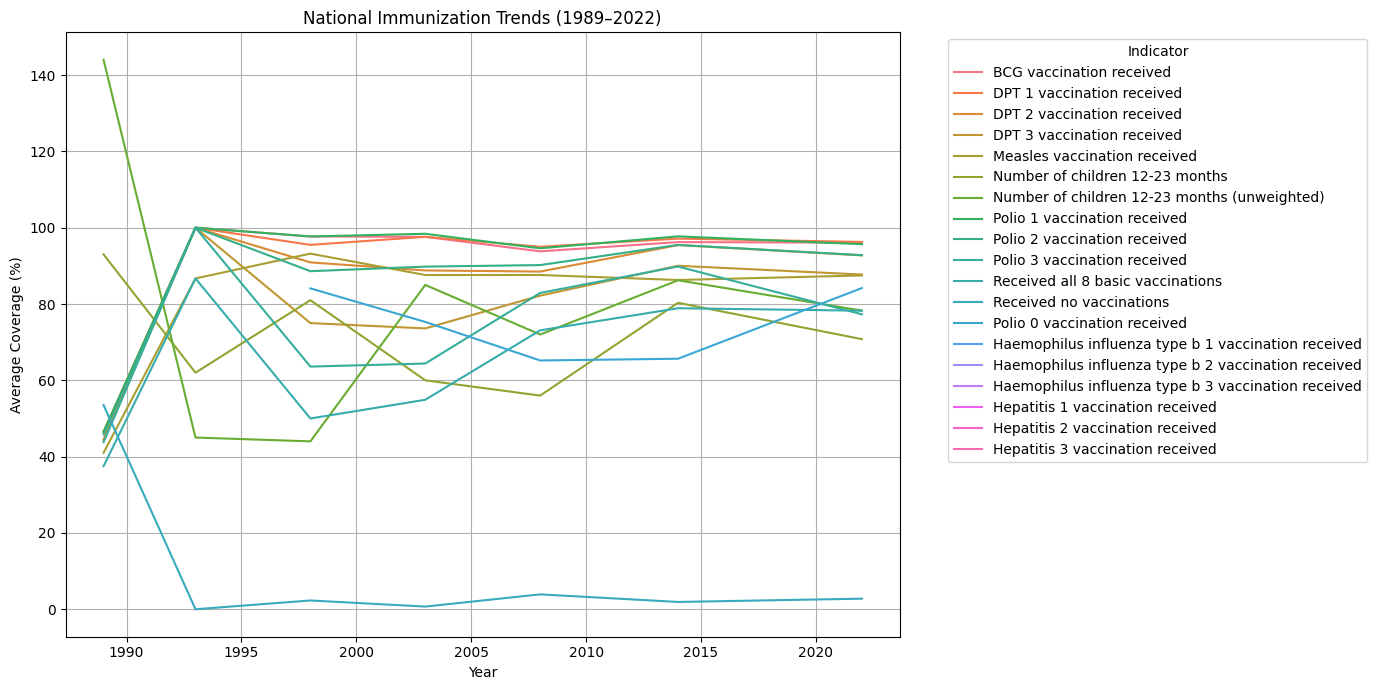

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average value per indicator per year (national level)
trend_all = data.groupby(['Date', 'Indicator'])['Value'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_all, x='Date', y='Value', hue='Indicator')
plt.title('National Immunization Trends (1989–2022)')
plt.xlabel('Year')
plt.ylabel('Average Coverage (%)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Indicator')
plt.tight_layout()
plt.show()


2. Heatmap: Indicator Coverage per County in 2022

/tmp/ipykernel_107109/177733026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_2022, x='Value', y='Indicator', palette='Blues_r')


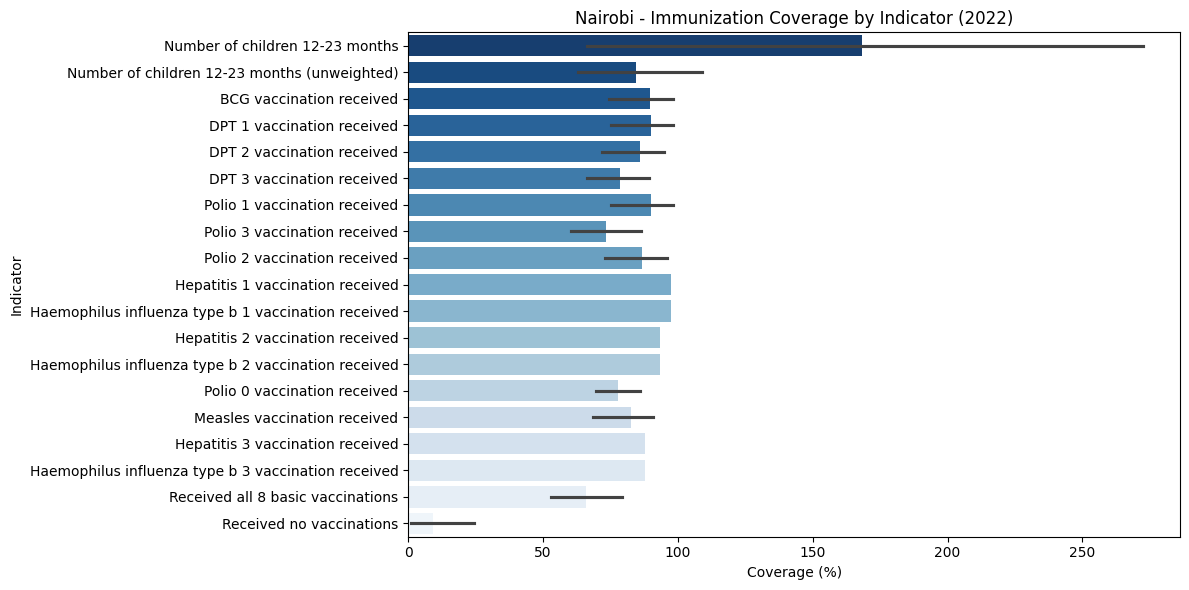

In [ ]:
county_name = 'Nairobi'

county_2022 = data[data['County'] == county_name].sort_values(by='Value', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=county_2022, x='Value', y='Indicator', palette='Blues_r')
plt.title(f'{county_name} - Immunization Coverage by Indicator (2022)')
plt.xlabel('Coverage (%)')
plt.ylabel('Indicator')
plt.tight_layout()
plt.show()


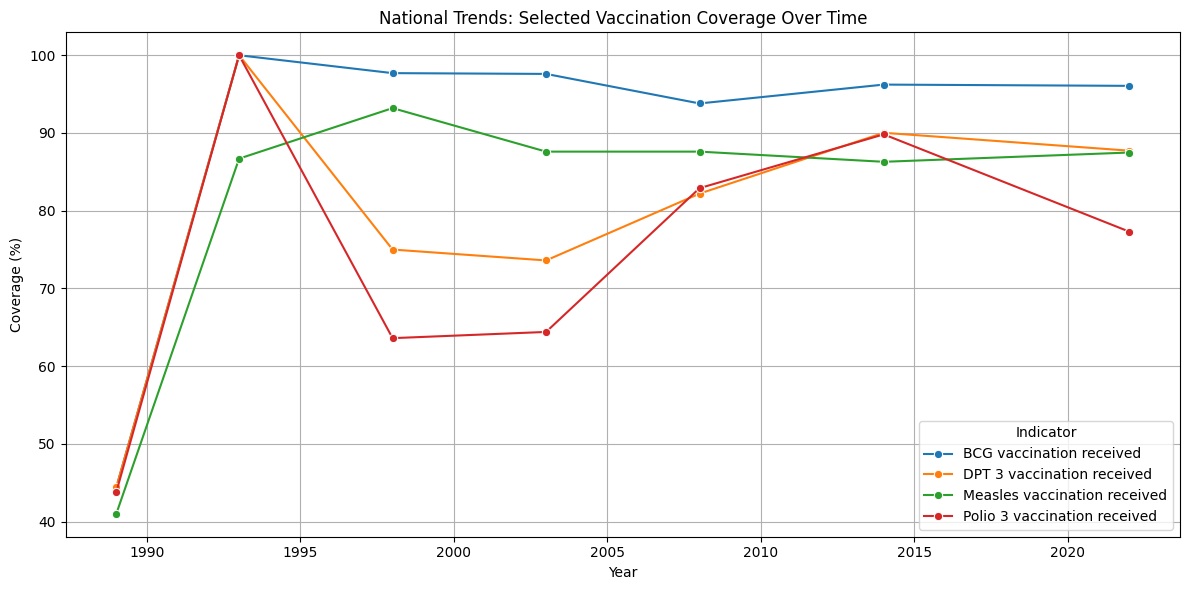

In [ ]:
indicators = ['BCG vaccination received', 'DPT 3 vaccination received', 'Polio 3 vaccination received', 'Measles vaccination received']
subset = data[data['Indicator'].isin(indicators)]

# Group and average by year and indicator
trends = subset.groupby(['Date', 'Indicator'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trends, x='Date', y='Value', hue='Indicator', marker='o')
plt.title('National Trends: Selected Vaccination Coverage Over Time')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()


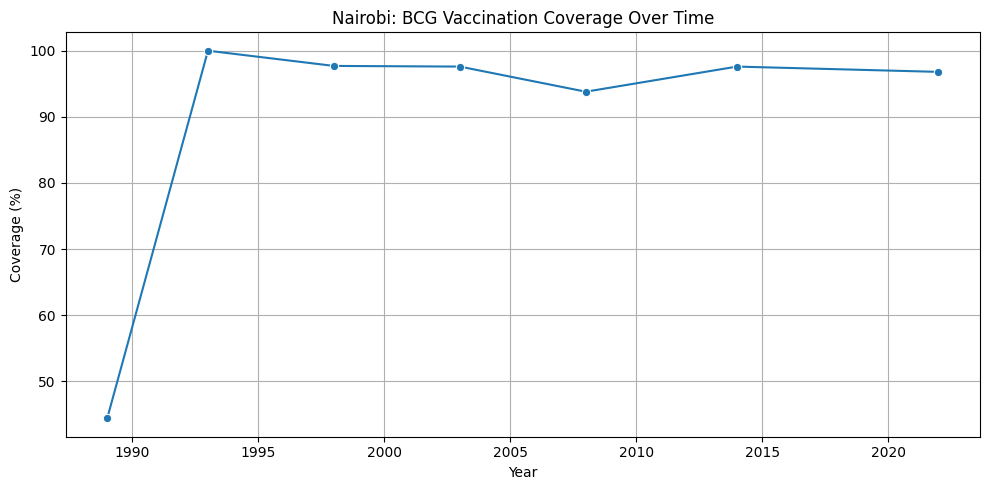

In [29]:
nairobi = data[(data['County'] == 'Nairobi') & (data['Indicator'] == 'BCG vaccination received')]

plt.figure(figsize=(10, 5))
sns.lineplot(data=nairobi, x='Date', y='Value', marker='o')
plt.title('Nairobi: BCG Vaccination Coverage Over Time')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
